### Check current version of tensorflow

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
print(tf.__version__)

2.3.0


#### Update tensorflow to 2.3.0

In [3]:
pip install --upgrade tensorflow==2.3.0

     |███████████████████████████▍    | 274.4 MB 147.8 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 320.4 MB 43 kB/s 
     |████████████████████████████████| 459 kB 117.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.5 MB/s s eta 0:00:01
     |████████████████████████████████| 5.8 MB 57.9 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 57.5 MB/s eta 0:00:01
     |████████████████████████████████| 20.1 MB 120.6 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 58.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 128.3 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.1
    Unin

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-serving-api 2.1.0 requires tensorflow~=2.1.0, but you have tensorflow 2.3.0 which is incompatible.
tensorflow-gpu 2.1.3 requires gast==0.2.2, but you have gast 0.3.3 which is incompatible.
tensorflow-gpu 2.1.3 requires keras-preprocessing==1.1.0, but you have keras-preprocessing 1.1.2 which is incompatible.
tensorflow-gpu 2.1.3 requires tensorboard<2.2.0,>=2.1.0, but you have tensorboard 2.7.0 which is incompatible.
tensorflow-gpu 2.1.3 requires tensorflow-estimator<2.2.0,>=2.1.0rc0, but you have tensorflow-estimator 2.3.0 which is incompatible.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Restart kernel after update 
import os
os._exit(00)

# Load train and test data

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
print(tf.__version__)

2.3.0


In [6]:
import os 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
IMG_WIDTH = 150
IMG_HEIGHT = 150

BATCH_SIZE = 32

In [8]:
data_dir_train = 'data/processed/train/'
data_dir_test = 'data/processed/test/'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels = "inferred",
    validation_split = 0.0,
    #shuffle = True,
    seed = 42,
    #subset = "training",
    batch_size = BATCH_SIZE,
    image_size = (IMG_WIDTH, IMG_HEIGHT)
)


Found 13656 files belonging to 2 classes.


In [9]:
##
#val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#    data_dir_train,
#    labels = "inferred",
#    validation_split = 0.2,
#    shuffle = True,
#    seed = 42, 
#    subset = "validation",
#    batch_size = BATCH_SIZE,
#    image_size = (IMG_WIDTH, IMG_HEIGHT)
#)

In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    labels = "inferred",
    validation_split = 0.0,
    shuffle = False,
    seed = 42, 
    batch_size = BATCH_SIZE,
    image_size = (IMG_WIDTH, IMG_HEIGHT)
)

Found 1537 files belonging to 2 classes.


In [8]:
#for item in val_ds:
#    print(item)
#    break

# VGG16
We explore different variations and sizes of VGG with pretrained weights.

## VGG16 retrained on last 3 dense layers + dropout regularization

In [13]:
from models.models_vgg16 import VGG16, VGG16aug

In [14]:
model_vgg16 = VGG16(IMG_WIDTH, IMG_HEIGHT)

58892288/58889256 [==============================] - 1s 0us/step


In [15]:
METRICS = [tf.keras.metrics.AUC(name = "AUC"), 
           tf.keras.metrics.BinaryAccuracy(name = "accuracy"), 
           tf.keras.metrics.Precision(name = "precision"),
           tf.keras.metrics.Recall(name = "recall")]


In [16]:
lr = 3e-4

model_vgg16.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = False), #BinaryCrossentropy(from_logits = False),
    metrics = METRICS
)

In [123]:
initial_epochs = 3
history_vgg16 = model_vgg16.fit(train_ds, epochs = initial_epochs, validation_data = val_ds)


Epoch 1/3
427/427 [==============================] - 122s 287ms/step - loss: 9.1716 - AUC: 0.7390 - accuracy: 0.7464 - precision: 0.5523 - recall: 0.5112 - val_loss: 5.8180 - val_AUC: 0.7176 - val_accuracy: 0.8725 - val_precision: 0.2414 - val_recall: 0.0387
Epoch 2/3
427/427 [==============================] - 121s 283ms/step - loss: 4.4816 - AUC: 0.8292 - accuracy: 0.7994 - precision: 0.6760 - recall: 0.5480 - val_loss: 3.2399 - val_AUC: 0.7658 - val_accuracy: 0.8770 - val_precision: 0.4000 - val_recall: 0.0884
Epoch 3/3
427/427 [==============================] - 121s 283ms/step - loss: 2.5721 - AUC: 0.8592 - accuracy: 0.8162 - precision: 0.7201 - recall: 0.5649 - val_loss: 1.8787 - val_AUC: 0.7959 - val_accuracy: 0.8796 - val_precision: 0.4444 - val_recall: 0.0884


In [124]:
initial_epochs = 7
history_vgg16_2 = model_vgg16.fit(train_ds, epochs = initial_epochs, validation_data = val_ds)


Epoch 1/7
427/427 [==============================] - 121s 283ms/step - loss: 1.6413 - AUC: 0.8703 - accuracy: 0.8237 - precision: 0.7324 - recall: 0.5861 - val_loss: 1.2525 - val_AUC: 0.7976 - val_accuracy: 0.8829 - val_precision: 0.5185 - val_recall: 0.0773
Epoch 2/7
427/427 [==============================] - 120s 282ms/step - loss: 1.1286 - AUC: 0.8747 - accuracy: 0.8237 - precision: 0.7348 - recall: 0.5819 - val_loss: 0.8775 - val_AUC: 0.8039 - val_accuracy: 0.8796 - val_precision: 0.4286 - val_recall: 0.0663
Epoch 3/7
427/427 [==============================] - 121s 282ms/step - loss: 0.8527 - AUC: 0.8813 - accuracy: 0.8281 - precision: 0.7464 - recall: 0.5874 - val_loss: 0.7075 - val_AUC: 0.7978 - val_accuracy: 0.8738 - val_precision: 0.4110 - val_recall: 0.1657
Epoch 4/7
427/427 [==============================] - 120s 282ms/step - loss: 0.7285 - AUC: 0.8808 - accuracy: 0.8316 - precision: 0.7506 - recall: 0.5996 - val_loss: 0.6004 - val_AUC: 0.8049 - val_accuracy: 0.8764 - val_pre

In [37]:
# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)


initial_epochs = 3


for epoch in range(initial_epochs):
    print(f"Epoch: {epoch}")
    step = 0
    num_batch = 0
    
    for x_batch, y_batch in tqdm(train_ds):
        num_batch += 1
        if num_batch == 147:
            continue
        step += 1
        with tf.GradientTape() as tape:
            logits = model_vgg16(x_batch, training = True)
            
            loss_value = loss_fn(y_batch, logits)
            
        grads = tape.gradient(loss_value, model_vgg16.trainable_weights)
        
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * BATCH_SIZE))
        #print(num_batch)
        
        

Epoch: 0


 34%|███▍      | 147/427 [00:43<01:22,  3.41it/s]


InvalidArgumentError: assertion failed: [Unable to decode bytes as JPEG, PNG, GIF, or BMP]
	 [[{{node decode_image/cond_jpeg/else/_1/decode_image/cond_jpeg/cond_png/else/_20/decode_image/cond_jpeg/cond_png/cond_gif/else/_39/decode_image/cond_jpeg/cond_png/cond_gif/Assert/Assert}}]]

In [36]:
print(num_batch)

147


In [36]:
print(history_vgg16.history)

{'loss': [8.320067405700684, 4.480762481689453, 2.954956293106079], 'AUC': [0.6096783876419067, 0.7112303972244263, 0.744020402431488], 'accuracy': [0.8279834389686584, 0.860082745552063, 0.8741751313209534], 'precision': [0.20700985193252563, 0.2753623127937317, 0.35944700241088867], 'recall': [0.1884346902370453, 0.15154536068439484, 0.15553340315818787], 'val_loss': [5.382885456085205, 3.528676748275757, 2.375058174133301], 'val_AUC': [0.7203466296195984, 0.7822547554969788, 0.7904117107391357], 'val_accuracy': [0.8822381496429443, 0.8854911923408508, 0.8841899633407593], 'val_precision': [0.0, 0.692307710647583, 1.0], 'val_recall': [0.0, 0.049723755568265915, 0.016574585810303688]}


In [172]:
model_vgg16.summary()

Model: "vg_g16_custom_new_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  8193000   
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  300300    
_________________________________________________________________
dropout_3 (Dropout)          multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple          

## Larger VGG16 retrained on last 4 dense layers + dropout regularization
Architecture: 
last layers after flattening:
Dense(2000)-Dropout(0.5)-Dense(800)
Dropout(0.5)
Dense(100)
Dropout(0.5)
Dense(1)

In [12]:
model_vgg16_aug = VGG16aug(IMG_WIDTH, IMG_HEIGHT)

lr = 3e-4

model_vgg16_aug.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = False), #BinaryCrossentropy(from_logits = False),
    metrics = 
    METRICS
)

In [13]:
initial_epochs = 10
history_vgg16_aug = model_vgg16_aug.fit(train_ds, epochs = initial_epochs, validation_data = val_ds)

Epoch 1/10
280/280 [==============================] - 74s 266ms/step - loss: 13.0633 - AUC: 0.5772 - accuracy: 0.8306 - precision: 0.1493 - recall: 0.1087 - val_loss: 7.9799 - val_AUC: 0.7123 - val_accuracy: 0.8822 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
280/280 [==============================] - 73s 262ms/step - loss: 5.9590 - AUC: 0.6816 - accuracy: 0.8778 - precision: 0.1642 - recall: 0.0219 - val_loss: 4.2896 - val_AUC: 0.7634 - val_accuracy: 0.8822 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
280/280 [==============================] - 74s 263ms/step - loss: 3.3774 - AUC: 0.7136 - accuracy: 0.8816 - precision: 0.2407 - recall: 0.0259 - val_loss: 2.5200 - val_AUC: 0.7739 - val_accuracy: 0.8822 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
280/280 [==============================] - 73s 262ms/step - loss: 1.9920 - AUC: 0.7504 - accuracy: 0.8861 - precision: 0.2222 - recall: 0.0060 - val_loss: 1.5473 - val_AUC: 0.7904 - val_a

# ResNet

In [11]:
METRICS = [tf.keras.metrics.AUC(name = "AUC"), 
           tf.keras.metrics.BinaryAccuracy(name = "accuracy"), 
           tf.keras.metrics.Precision(name = "precision"),
           tf.keras.metrics.Recall(name = "recall")]


In [53]:
!pip install pyyaml h5py 

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.


In [41]:
%ls ./training/

checkpoint  cp-0001.ckpt.data-00000-of-00001  cp-0001.ckpt.index


In [42]:
checkpoint_path = './training/cp-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [43]:
checkpoint_path

'./training/cp-{epoch:04d}.ckpt'

In [44]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    save_weights_only = True,
    verbose = 1
)

In [45]:
from models.models_resnet import ResNet50

In [46]:
model_resnet = ResNet50(IMG_WIDTH, IMG_HEIGHT)

lr = 3e-4

model_resnet.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = False), #BinaryCrossentropy(from_logits = False),
    metrics = 
    METRICS
)

In [37]:
initial_epochs = 1
history_resnet = model_resnet.fit(train_ds, 
                                  epochs = initial_epochs, 
                                  validation_data = val_ds,
                                  callbacks = [cp_callback])

427/427 [==============================] - ETA: 0s - loss: 5.5897 - AUC: 0.7470 - accuracy: 0.7615 - precision: 0.5534 - recall: 0.5056
Epoch 00001: saving model to ./training/cp-0001.ckpt
427/427 [==============================] - 120s 280ms/step - loss: 5.5897 - AUC: 0.7470 - accuracy: 0.7615 - precision: 0.5534 - recall: 0.5056 - val_loss: 2.0145 - val_AUC: 0.7372 - val_accuracy: 0.8803 - val_precision: 0.4211 - val_recall: 0.0442


In [47]:
os.listdir(checkpoint_dir)

['.ipynb_checkpoints',
 'cp-0001.ckpt.data-00000-of-00001',
 'cp-0001.ckpt.index',
 'checkpoint']

In [48]:
model_test = ResNet50(IMG_WIDTH, IMG_HEIGHT)

model_test.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
                  loss = tf.keras.losses.BinaryCrossentropy(from_logits = False),
                  metrics = METRICS)


In [49]:
model_test.fit(train_ds, 
               epochs = 1,
              validation_data = val_ds)

427/427 [==============================] - 118s 277ms/step - loss: 5.7625 - AUC: 0.7566 - accuracy: 0.7666 - precision: 0.5636 - recall: 0.5173 - val_loss: 2.1183 - val_AUC: 0.7537 - val_accuracy: 0.8809 - val_precision: 0.4615 - val_recall: 0.0663


In [57]:
model_test.load_weights('./training/cp-0001.ckpt')

In [58]:
preds = model_test.predict(val_ds)


In [59]:
preds

array([[0.21868916],
       [0.21557398],
       [0.06801223],
       ...,
       [0.28538123],
       [0.24157326],
       [0.05410865]], dtype=float32)

In [60]:
preds = [1 if pred > 0.5 else 0 for pred in preds]
preds

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(preds, test_labels)


NameError: name 'test_labels' is not defined

In [98]:
preds_resnet = model_resnet.predict(val_ds)
preds_resnet = [prob[0] for prob in preds_resnet]
preds_resnet

[0.2498209,
 0.41986144,
 0.027611354,
 0.43621403,
 0.22604129,
 0.20733821,
 0.21681795,
 0.38893333,
 0.25078514,
 0.11390686,
 0.22863618,
 0.24871348,
 0.11963376,
 0.22439787,
 0.063260466,
 0.16480902,
 0.4495684,
 0.09077853,
 0.30585864,
 0.09247598,
 0.21381044,
 0.10715521,
 0.6064059,
 0.2184623,
 0.40134698,
 0.4524548,
 0.32343972,
 0.2370961,
 0.25960422,
 0.3989988,
 0.22453652,
 0.13603091,
 0.27753204,
 0.069263235,
 0.1774761,
 0.10067225,
 0.15456748,
 0.2249928,
 0.4444993,
 0.16446537,
 0.22192557,
 0.3563604,
 0.5549331,
 0.23882696,
 0.27427083,
 0.1822735,
 0.19573769,
 0.28317595,
 0.36189765,
 0.15554951,
 0.3154702,
 0.104643896,
 0.061719056,
 0.08205519,
 0.09664791,
 0.06494268,
 0.09770874,
 0.04931894,
 0.09944096,
 0.10936917,
 0.021138346,
 0.02666021,
 0.10216459,
 0.085646994,
 0.07294874,
 0.15757206,
 0.07233473,
 0.055593334,
 0.055077795,
 0.06080877,
 0.052905016,
 0.1197291,
 0.03451443,
 0.04564494,
 0.13280088,
 0.034184355,
 0.053755194,
 0

In [29]:
lst_files_test = os.listdir('data/processed/test/benign')
num_benign_test = len(lst_files_test)
lst_files_malignant_test = os.listdir('data/processed/test/malignant')
num_malignant_test = len(lst_files_malignant_test)
lst_files_test.extend(lst_files_malignant_test)



In [99]:
df_resnet = pd.DataFrame({'img_name': lst_files_test, 'prob': preds_resnet})

In [100]:
df_resnet.to_csv('predictions/preds_resnet.csv', index = False)


# EfficientNet

In [10]:
from models.models_efficient_net import EfficientNet

In [11]:
METRICS = [tf.keras.metrics.AUC(name = "AUC"), 
           tf.keras.metrics.BinaryAccuracy(name = "accuracy"), 
           tf.keras.metrics.Precision(name = "precision"),
           tf.keras.metrics.Recall(name = "recall")]


In [12]:
model_effnet = EfficientNet(IMG_WIDTH, IMG_HEIGHT)

lr = 3e-4

model_effnet.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = False), #BinaryCrossentropy(from_logits = False),
    metrics = 
    METRICS
)

In [13]:
initial_epochs = 10
history_effnet = model_effnet.fit(train_ds, epochs = initial_epochs, validation_data = val_ds)

Epoch 1/10
427/427 [==============================] - 483s 1s/step - loss: 13.7568 - AUC: 0.7688 - accuracy: 0.7695 - precision: 0.6122 - recall: 0.4883 - val_loss: 6.1214 - val_AUC: 0.7734 - val_accuracy: 0.8640 - val_precision: 0.3600 - val_recall: 0.1989
Epoch 2/10
427/427 [==============================] - 114s 268ms/step - loss: 4.1020 - AUC: 0.8454 - accuracy: 0.8104 - precision: 0.7210 - recall: 0.5297 - val_loss: 2.5181 - val_AUC: 0.7571 - val_accuracy: 0.8855 - val_precision: 0.7273 - val_recall: 0.0442
Epoch 3/10
427/427 [==============================] - 114s 267ms/step - loss: 1.8481 - AUC: 0.8504 - accuracy: 0.8140 - precision: 0.7326 - recall: 0.5316 - val_loss: 1.1798 - val_AUC: 0.7805 - val_accuracy: 0.8835 - val_precision: 0.5556 - val_recall: 0.0552
Epoch 4/10
427/427 [==============================] - 114s 267ms/step - loss: 0.9947 - AUC: 0.8523 - accuracy: 0.8190 - precision: 0.7451 - recall: 0.5399 - val_loss: 0.6765 - val_AUC: 0.7806 - val_accuracy: 0.8822 - val_p

In [94]:
# save predictions on val_ds

preds_effnet = model_effnet.predict(val_ds)

In [95]:
preds_effnet = [prob[0] for prob in preds_effnet]


In [96]:
df_effnet = pd.DataFrame({'img_name': lst_files_test, 'prob': preds_effnet})




In [97]:
df_effnet.to_csv('predictions/preds_effnet.csv', index = False)


# Comparing ROC curves, AUC scores

In [78]:
# plot ROC curve
import numpy as np
import math
from sklearn.metrics import roc_curve

# utils:

def get_predictions(data, model):
    predictions = np.array([])
    test_labels = np.array([])
    num_batches = 0
    val_examples = 1537 
    
    for batch, y in data:
        predictions = np.append(predictions, model.predict(batch))
        test_labels = np.append(test_labels, y)
        num_batches += 1
        if num_batches == math.ceil(val_examples / BATCH_SIZE):
            break
    return test_labels, predictions

def plot_roc(data, model):
    
    test_labels, predictions = get_predictions(data, model)

    #pred_classes = [1 if val > 0.5 else 0 for val in predictions ]
    fp, tp, _ = roc_curve(test_labels, predictions)
    plt.plot(fp*100, tp*100)
    plt.xlabel("FP rate")
    plt.ylabel("TP rate")
    #plt.show()
    


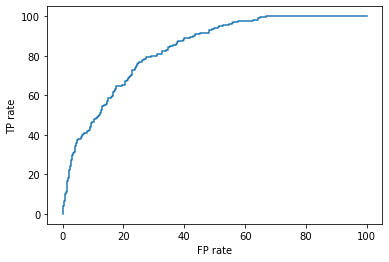

In [80]:
plot_roc(val_ds, model_resnet)


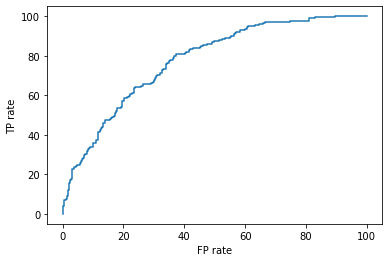

In [81]:
plot_roc(val_ds, model_effnet)

## TPR, FPR

[[0.06741527]
 [0.11062878]
 [0.03968845]
 ...
 [0.22215804]
 [0.00605361]
 [0.0033764 ]]


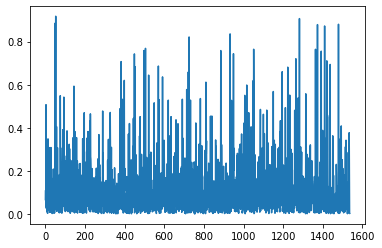

In [82]:
predictions = model_effnet.predict(val_ds)
print(predictions)
import matplotlib.pyplot as plt
plt.plot(predictions)

In [76]:
test_labels, predictions = get_predictions(val_ds)

NameError: name 'get_predictions' is not defined

In [77]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(test_labels, predictions)

NameError: name 'predictions' is not defined

In [ ]:
print(len(predictions))
pred_classes = [1 if val > 0.1 else 0 for val in predictions ]
len(pred_classes)

# compute fpr and tpr for threshold 0.5
FP, TP, P, N = 0, 0, 0, 0

for (true_label, pred_label) in zip(test_labels, pred_classes):
    if true_label == 0: # not sick
        N += 1
        if pred_label == 1:
            FP += 1
    else: # true_label = 1 (sick)
        P += 1
        if pred_label == 1:
            TP += 1

FPR = FP / N
TPR = TP / P

In [ ]:
# what percentage of positive people will be classified as negative?
# = FN / P 
FN = P - TP
print(f"Percentage of positive people who will be wrongly classified as negative: {round(FN / P * 100, 2)}%.")

In [ ]:
# FPR = FP / N

print(f"Percentage of negative people who will be wrongly classified as positive: {round(FPR, 2)}%.")


In [ ]:
# to do:
# data augmentation, skin tone / hair / brightness ... 
# crop images 
# larger model, different architecture
# regularization
# tuning pars: learning rate, 
# increase image resolution



In [25]:
import math

def get_test_labels(data):
    
    test_labels = np.array([])
    num_batches = 0
    val_examples = 1537 
    
    for batch, y in data:
        print(batch[0][0][0][0])
        test_labels = np.append(test_labels, y)
        num_batches += 1
        if num_batches == math.ceil(val_examples / BATCH_SIZE):
            break
    return test_labels

In [26]:
test_labels = get_test_labels(val_ds)

tf.Tensor(3.0403547, shape=(), dtype=float32)
tf.Tensor(173.91853, shape=(), dtype=float32)
tf.Tensor(19.932978, shape=(), dtype=float32)
tf.Tensor(110.91853, shape=(), dtype=float32)
tf.Tensor(134.85333, shape=(), dtype=float32)
tf.Tensor(142.24, shape=(), dtype=float32)
tf.Tensor(157.80711, shape=(), dtype=float32)
tf.Tensor(137.55356, shape=(), dtype=float32)
tf.Tensor(10.973556, shape=(), dtype=float32)
tf.Tensor(19.921423, shape=(), dtype=float32)
tf.Tensor(215.5975, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(232.5, shape=(), dtype=float32)
tf.Tensor(192.5, shape=(), dtype=float32)
tf.Tensor(171.5, shape=(), dtype=float32)
tf.Tensor(232.5, shape=(), dtype=float32)
tf.Tensor(40.0, shape=(), dtype=float32)
tf.Tensor(203.0, shape=(), dtype=float32)
tf.Tensor(179.0, shape=(), dtype=float32)
tf.Tensor(177.5, shape=(), dtype=float32)
tf.Tensor(56.5, shape=(), dtype=float32)
tf.Tensor(182.0, shape=(), dtype=float32)
tf.Tensor(232.0, shape=(), dtype=float32

In [27]:
test_labels = pd.DataFrame({'labels':test_labels})

In [105]:
test_labels.to_csv('evaluate/test_labels.csv', index = False)